<a href="https://colab.research.google.com/github/rafey1104/Sentiment_Analysis_Hugging_Face_Transformers/blob/main/Sentiment_Analysis_Hugging_Face_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A typical Data Science Workflow**

Step - 1
    **Data Pre-processing**


*   Data Collection
*   Data Cleaning
*   Data Splitting







The first step in the data pre-processing phase will be to collect the data form relevant resources. In this project, I used the Instagram PlayStore Review Dataset which I got from the Kaggle Platform.  

**`Data Collection`**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/instagram.csv");

In [3]:
df.head()

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3.0,11-07-2023 23:57
1,"Used to be my favorite social media app, but ""...",2.0,22-07-2023 21:37
2,Instagram is the best of all the social media....,5.0,25-07-2023 03:24
3,"I love this app.. but as of late, I have been ...",2.0,09-07-2023 04:49
4,Used to be a great app but there are so many m...,3.0,17-07-2023 16:47


In [4]:
df.columns

Index(['review_description', 'rating', 'review_date'], dtype='object')

**`Data Cleaning`**

Checking if there are any null values

In [5]:
df.isnull().sum()

review_description    0
rating                1
review_date           1
dtype: int64

For NLP based like this we have several packages to clean the text for example nltk, spacy, flfy, contractions, regex, neattext etc...

For this project I will be using neattext for data cleaning

Basic Task of data cleaning

*   remove stopwords
*   remove punctuations
*   Special Characters
*   noise
*   contractions







In [6]:
df['review_description']

0         The app is good for connecting with friends, f...
1         Used to be my favorite social media app, but "...
2         Instagram is the best of all the social media....
3         I love this app.. but as of late, I have been ...
4         Used to be a great app but there are so many m...
                                ...                        
165829    ever since the most recent "upgrade" the app f...
165830    Great social media page but the problem with I...
165831    This app is awesome. Pro tip, if you want to s...
165832    It has given me a very nice experience With Th...
165833    What is the problem with this app now suddenly...
Name: review_description, Length: 165834, dtype: object

In [7]:
df['lowercase'] = df['review_description'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [8]:
df.head()

,review_description,rating,review_date,lowercase
0,"The app is good for connecting with friends, f...",3.0,11-07-2023 23:57,"the app is good for connecting with friends, f..."
1,"Used to be my favorite social media app, but ""...",2.0,22-07-2023 21:37,"used to be my favorite social media app, but ""..."
2,Instagram is the best of all the social media....,5.0,25-07-2023 03:24,instagram is the best of all the social media....
3,"I love this app.. but as of late, I have been ...",2.0,09-07-2023 04:49,"i love this app.. but as of late, i have been ..."
4,Used to be a great app but there are so many m...,3.0,17-07-2023 16:47,used to be a great app but there are so many m...


In [9]:
df['punctuation']= df['lowercase'].str.replace('[^\w\s]', '')

<ipython-input-9-4b87b7ab0654>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['punctuation']= df['lowercase'].str.replace('[^\w\s]', '')


In [10]:
df.head()

,review_description,rating,review_date,lowercase,punctuation
0,"The app is good for connecting with friends, f...",3.0,11-07-2023 23:57,"the app is good for connecting with friends, f...",the app is good for connecting with friends fa...
1,"Used to be my favorite social media app, but ""...",2.0,22-07-2023 21:37,"used to be my favorite social media app, but ""...",used to be my favorite social media app but im...
2,Instagram is the best of all the social media....,5.0,25-07-2023 03:24,instagram is the best of all the social media....,instagram is the best of all the social media ...
3,"I love this app.. but as of late, I have been ...",2.0,09-07-2023 04:49,"i love this app.. but as of late, i have been ...",i love this app but as of late i have been hav...
4,Used to be a great app but there are so many m...,3.0,17-07-2023 16:47,used to be a great app but there are so many m...,used to be a great app but there are so many m...


removing stop words

In [11]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stop_words = stopwords.words('english')

In [13]:
df['stopwords'] = df['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [14]:
df.head()

,review_description,rating,review_date,lowercase,punctuation,stopwords
0,"The app is good for connecting with friends, f...",3.0,11-07-2023 23:57,"the app is good for connecting with friends, f...",the app is good for connecting with friends fa...,app good connecting friends family even potent...
1,"Used to be my favorite social media app, but ""...",2.0,22-07-2023 21:37,"used to be my favorite social media app, but ""...",used to be my favorite social media app but im...,used favorite social media app improvements ma...
2,Instagram is the best of all the social media....,5.0,25-07-2023 03:24,instagram is the best of all the social media....,instagram is the best of all the social media ...,instagram best social media ig posting platfor...
3,"I love this app.. but as of late, I have been ...",2.0,09-07-2023 04:49,"i love this app.. but as of late, i have been ...",i love this app but as of late i have been hav...,love app late problems screen background turni...
4,Used to be a great app but there are so many m...,3.0,17-07-2023 16:47,used to be a great app but there are so many m...,used to be a great app but there are so many m...,used great app many bugs issues ever plus ruin...


In [15]:
df['cleaned_review'] = df['stopwords']

In [16]:
df.to_csv('cleaned_dataset.csv', index=False)

In [17]:
dfc = pd.read_csv("/content/cleaned_dataset.csv");

In [18]:
dfc.head()

,review_description,rating,review_date,lowercase,punctuation,stopwords,cleaned_review
0,"The app is good for connecting with friends, f...",3.0,11-07-2023 23:57,"the app is good for connecting with friends, f...",the app is good for connecting with friends fa...,app good connecting friends family even potent...,app good connecting friends family even potent...
1,"Used to be my favorite social media app, but ""...",2.0,22-07-2023 21:37,"used to be my favorite social media app, but ""...",used to be my favorite social media app but im...,used favorite social media app improvements ma...,used favorite social media app improvements ma...
2,Instagram is the best of all the social media....,5.0,25-07-2023 03:24,instagram is the best of all the social media....,instagram is the best of all the social media ...,instagram best social media ig posting platfor...,instagram best social media ig posting platfor...
3,"I love this app.. but as of late, I have been ...",2.0,09-07-2023 04:49,"i love this app.. but as of late, i have been ...",i love this app but as of late i have been hav...,love app late problems screen background turni...,love app late problems screen background turni...
4,Used to be a great app but there are so many m...,3.0,17-07-2023 16:47,used to be a great app but there are so many m...,used to be a great app but there are so many m...,used great app many bugs issues ever plus ruin...,used great app many bugs issues ever plus ruin...


**Step 2: Model Selection and Fine-tuning**

---










Hugging Face Transformers provides pre-trained models for sentiment analysis. We can load one of these models using the pipeline class. For sentiment analysis, you can use the sentiment-analysis pipeline

In [19]:
!pip install transformers
!pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.7 MB/s eta 0:00:00


In [20]:
from transformers import pipeline
Classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [21]:
def perform_sentiment_analysis(df, text_column='cleaned_review'):

    # Apply the sentiment analysis to the cleaned_review column
    results = Classifier(list(df[text_column]))

    labels = []
    scores = []
    for result in results:
      label = result.get('label')
      score = result.get('score')

      if label is not None:
        labels.append(label)

      if score is not None:
        scores.append(score)
    return pd.DataFrame({'label': labels, 'score': scores})
# df = perform_sentiment_analysis(df)

In [22]:
dfh = df.head(10)

In [23]:
dfh

,review_description,rating,review_date,lowercase,punctuation,stopwords,cleaned_review
0,"The app is good for connecting with friends, f...",3.0,11-07-2023 23:57,"the app is good for connecting with friends, f...",the app is good for connecting with friends fa...,app good connecting friends family even potent...,app good connecting friends family even potent...
1,"Used to be my favorite social media app, but ""...",2.0,22-07-2023 21:37,"used to be my favorite social media app, but ""...",used to be my favorite social media app but im...,used favorite social media app improvements ma...,used favorite social media app improvements ma...
2,Instagram is the best of all the social media....,5.0,25-07-2023 03:24,instagram is the best of all the social media....,instagram is the best of all the social media ...,instagram best social media ig posting platfor...,instagram best social media ig posting platfor...
3,"I love this app.. but as of late, I have been ...",2.0,09-07-2023 04:49,"i love this app.. but as of late, i have been ...",i love this app but as of late i have been hav...,love app late problems screen background turni...,love app late problems screen background turni...
4,Used to be a great app but there are so many m...,3.0,17-07-2023 16:47,used to be a great app but there are so many m...,used to be a great app but there are so many m...,used great app many bugs issues ever plus ruin...,used great app many bugs issues ever plus ruin...
5,The app has been glitching alot. Videos will n...,1.0,11-07-2023 05:04,the app has been glitching alot. videos will n...,the app has been glitching alot videos will no...,app glitching alot videos play instead show bl...,app glitching alot videos play instead show bl...
6,"I like this app a lot, but the messaging part ...",3.0,18-07-2023 12:48,"i like this app a lot, but the messaging part ...",i like this app a lot but the messaging part o...,like app lot messaging part app frustrating so...,like app lot messaging part app frustrating so...
7,"Eventhough sometimes it works, most of the tim...",2.0,13-07-2023 14:01,"eventhough sometimes it works, most of the tim...",eventhough sometimes it works most of the time...,eventhough sometimes works time doesnt quality...,eventhough sometimes works time doesnt quality...
8,I'm not sure what the point of leaving a revie...,1.0,14-07-2023 02:26,i'm not sure what the point of leaving a revie...,im not sure what the point of leaving a review...,im sure point leaving review accomplish recent...,im sure point leaving review accomplish recent...
9,This app has so many frustrating aspects. The ...,2.0,13-07-2023 07:46,this app has so many frustrating aspects. the ...,this app has so many frustrating aspects the t...,app many frustrating aspects themes wont work ...,app many frustrating aspects themes wont work ...


In [24]:
dfr = perform_sentiment_analysis(dfh)

Step-3 Data Visualization

In [25]:
dfr

,label,score
0,NEGATIVE,0.995438
1,NEGATIVE,0.996750
2,POSITIVE,0.990706
3,NEGATIVE,0.999614
4,NEGATIVE,0.999089
5,NEGATIVE,0.998807
6,NEGATIVE,0.997015
7,NEGATIVE,0.999060
8,NEGATIVE,0.690970
9,NEGATIVE,0.996902


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['score', 'label'], **{'inner': 'stick'})
chart

Step 3: Data Visualization

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

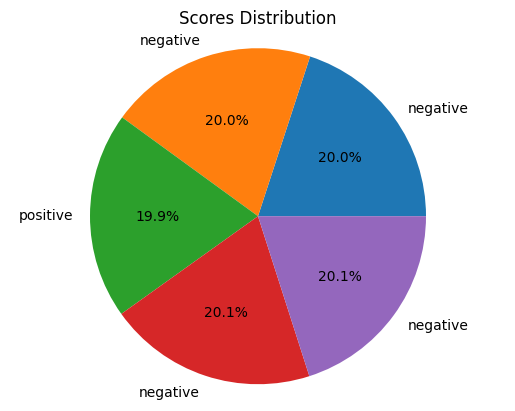

In [32]:
plt.pie(dfr['score'], labels=dfr['label'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Scores Distribution')

# Show the chart
plt.show()
